In [37]:
import pandas as pd
import numpy as np

# Читаємо CSV файл за допомогою pandas
df = pd.read_csv('youtube.csv', encoding='latin-1')

In [38]:
df_head_5 = df.head(5)
print(df_head_5)

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [39]:
print(df.shape)

(995, 28)


In [40]:
# Перевірка пропусків і підрахунок їх кількості в кожному стовпці
missing_values = df.isna().sum()

# Виведення кількості пропусків у кожному стовпці
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

# Заміна пропусків на NaN і зміна типу даних на числовий
df = df.fillna(np.nan)

# Перевірка кожного стовпця на наявність np.nan
for column in df.columns:
    if df[column].isna().any():
        try:
            df[column] = df[column].astype(float)
        except: 
            pass

# Виведення інформації про типи даних після змін
print(df.dtypes)

Кількість пропусків у кожному стовпці:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month        

In [43]:
# Знаходимо стовпці, які мають хоча б одне NaN значення
columns_with_nan = df.columns[df.isna().any()].tolist()

# Замінюємо NaN на середні значення тільки для вибраних стовпців
for column in columns_with_nan:
    # Перевіряємо тип даних стовпця (якщо це float або int)
    if np.issubdtype(df[column].dtype, np.number):
        column_mean = df[column].mean()
        df[column] = df[column].fillna(column_mean)

print(df)

     rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por Aï¿     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation      

In [44]:
# Перевірка кількості пропусків у кожному стовпці
missing_values_after = df.isna().sum()

# Виведення кількості пропусків у кожному стовпці після обробки
print("Кількість пропусків у кожному стовпці після обробки:")
print(missing_values_after)

Кількість пропусків у кожному стовпці після обробки:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created

In [45]:
# Підрахунок кількості унікальних країн у колонці "Country"
unique_countries = df['Country'].nunique()

# Виведення кількості унікальних країн
print("Кількість унікальних країн у колонці 'Country':", unique_countries)

Кількість унікальних країн у колонці 'Country': 49


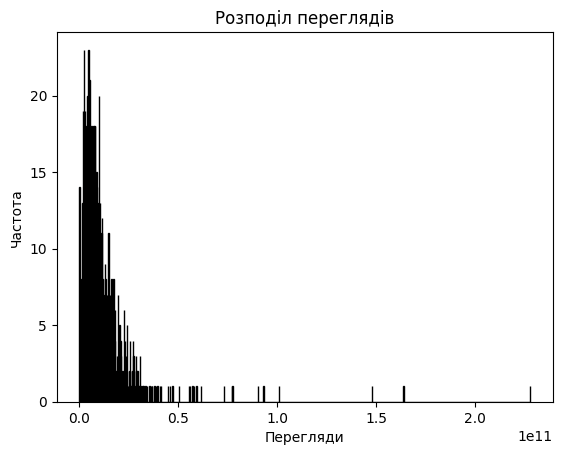

In [50]:
import matplotlib.pyplot as plt

# Кількість елементів у стовпці "Views"
num_elements = len(df['video views'])

# Визначення кількості інтервалів (bins)
bins = int(num_elements)  # Можете вибрати інший спосіб обчислення bins за вашими потребами

# Побудова гістограми розподілу переглядів
df['video views'].plot(kind='hist', bins=bins, edgecolor='black')

# Налаштування назви графіку та осей
plt.title('Розподіл переглядів')
plt.xlabel('Перегляди')
plt.ylabel('Частота')

# Відображення графіку
plt.show()

In [51]:
views_column_name = 'video views'

# Максимальна кількість переглядів
max_views = df[views_column_name].max()

# Мінімальна кількість переглядів
min_views = df[views_column_name].min()

# Середня кількість переглядів
mean_views = df[views_column_name].mean()

# Виведення результатів
print("Максимальна кількість переглядів:", max_views)
print("Мінімальна кількість переглядів:", min_views)
print("Середня кількість переглядів:", mean_views)


Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [52]:
# Підрахунок кількості відео для кожної країни
country_counts = df['Country'].value_counts()

# Знаходження країни з найбільшою кількістю відео
most_videos_country = country_counts.idxmax()

# Виведення результату
print("Країна з найбільшою кількістю відео на YouTube:", most_videos_country)

Країна з найбільшою кількістю відео на YouTube: United States


In [54]:
# Знаходження рядка з найбільшою кількістю завантажень
max_uploads_video = df[df['uploads'] == df['uploads'].max()]['Youtuber'].values[0]

# Виведення назви каналу з найбільшою кількістю завантажень
print("Канал з найбільшою кількістю завантажень:", max_uploads_video)

# Знаходження рядка з найменшою кількістю завантажень
min_uploads_video = df[df['uploads'] == df['uploads'].min()]['Youtuber'].values[0]

# Виведення назви каналу з найменшою кількістю завантажень
print("Канал з найменшою кількістю завантажень:", min_uploads_video)

Канал з найбільшою кількістю завантажень: ABP NEWS
Канал з найменшою кількістю завантажень: Music
